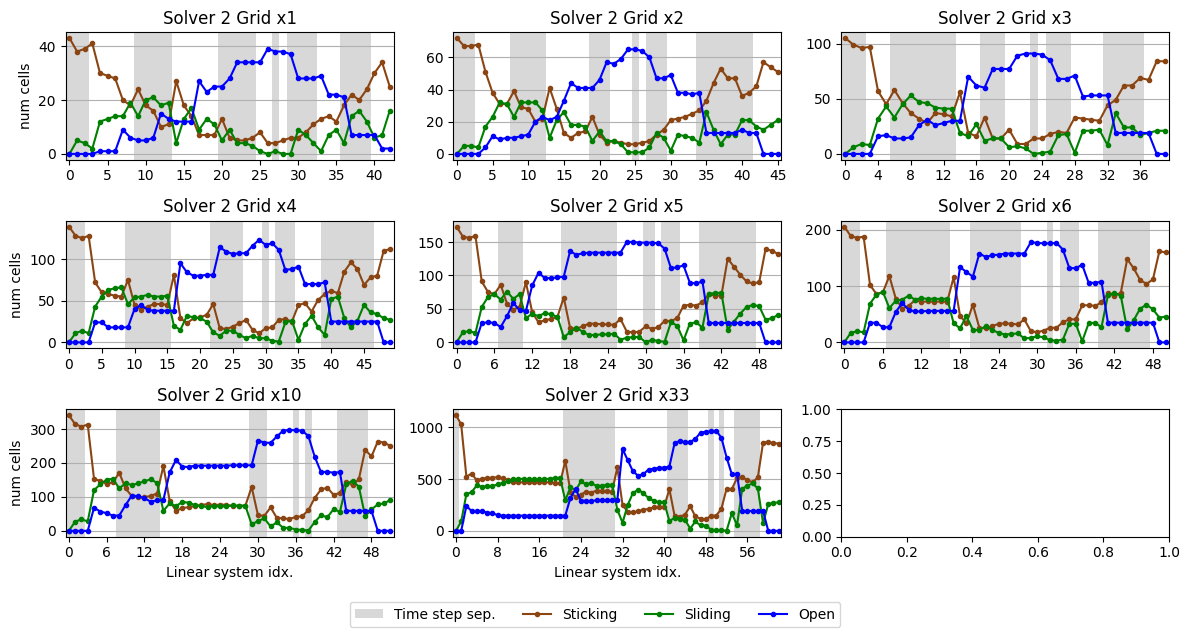

In [6]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *
from thm_models import make_model
import porepy as pp

solvers = [2]
ph = 1
bb = 2
fr = 1
grid_refinement = [
    1,
    2,
    3,
    4,
    5,
    6,
    10,
    33,
]

data = {}
names = {}
for i, [g, sol] in enumerate(product(grid_refinement, solvers)):
    data[i] = load_data(
        f"../../stats/stats_thermal_geo2x{g}_sol{sol}_bb{bb}_fr{fr}.json"
    )
    names[i] = f"Solver {sol} Grid x{g}"


shape = [3, 3]
figsize = (12, 6)


def render_element(i: int, entry: Sequence[TimeStepStats]):
    st, sl, op = get_num_sticking_sliding_open(entry)
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which="major", axis="y")
    plt.plot(st, label="Sticking", marker=".", color=COLOR_STICKING)
    plt.plot(sl, label="Sliding", marker=".", color=COLOR_SLIDING)
    plt.plot(op, label="Open", marker=".", color=COLOR_OPEN)
    # plt.plot(tr, label="Transition", marker=".", color=COLOR_TRANSITION)


plot_grid(
    data,
    render_element,
    shape=shape,
    figsize=figsize,
    ylabel="num cells",
    ax_titles=names,
    #   ylabel="Fract. len., m"
)
# plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

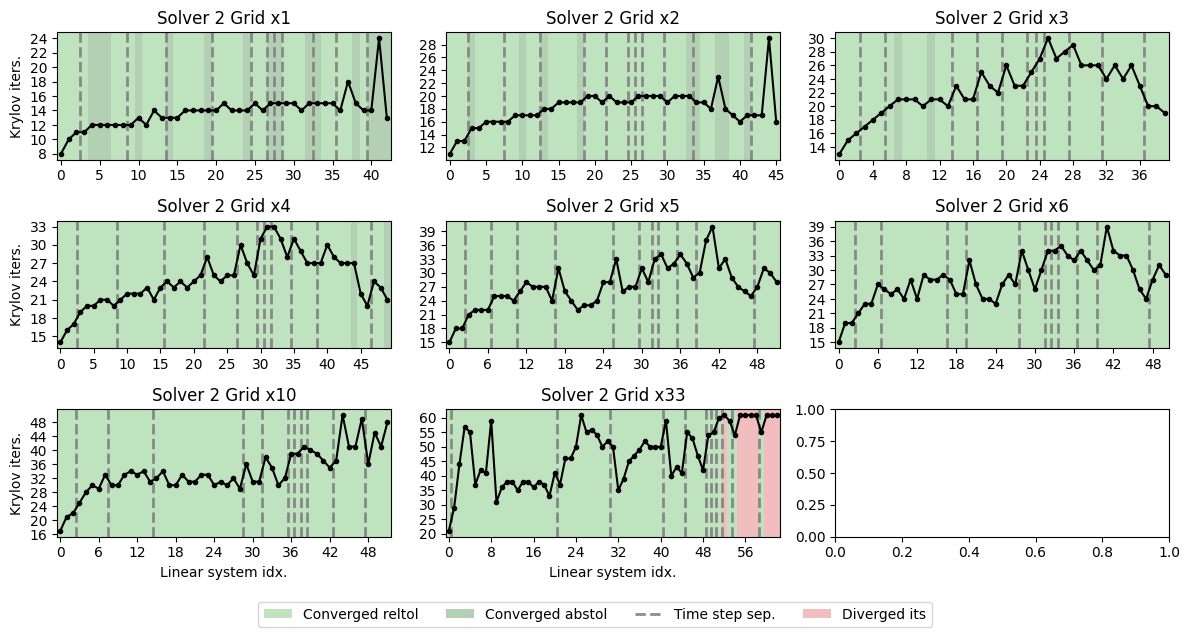

In [7]:
def render_element(entry: list[TimeStepStats]):
    color_converged_reason(entry)
    # color_sticking_sliding_open(entry)

    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")

    coulomb_mismatch = [ls.coulomb_mismatch for ts in entry for ls in ts.linear_solves]
    sticking_ut = [ls.sticking_u_mismatch for ts in entry for ls in ts.linear_solves]
    lambdan_max = [ls.lambdan_max for ts in entry for ls in ts.linear_solves]
    lambdan_max[0] = 0
    lambdat_max = [ls.lambdat_max for ts in entry for ls in ts.linear_solves]
    ujumpn_max = [ls.un_max for ts in entry for ls in ts.linear_solves]
    ujumpt_max = [ls.ut_max for ts in entry for ls in ts.linear_solves]
    error_rotation = [ls.error_matrix_contribution for ts in entry for ls in ts.linear_solves]


    # plt.gca().twinx()
    # plt.yscale('log')
    # plt.plot(coulomb_mismatch, label="Coulomb mismatch")  # interesting
    # plt.plot(sticking_ut, label=r'Sticking $u_\tau$ mismatch')  # interesting
    # plt.plot(lambdan_max, label=r'$\lambda_n$ max')
    # plt.plot(lambdat_max, label=r'$\lambda_\tau$ max')
    # plt.plot(ujumpn_max, label=r"$u_n$ max")
    # plt.plot(ujumpt_max, label=r'$u_\tau$ max')
    # plt.plot(error_rotation, label="Error matrix contribution")  # interesting
    # plt.ylim(bottom=1e-6)

plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

In [8]:
from collections import defaultdict
import pandas as pd

table = defaultdict(lambda: [])

NDIGITS = 2

grid_refinement = [1, 2, 3, 4, 5, 6, 10 ,33]

for g in grid_refinement:
    stats_name = f"stats_thermal_geo2x{g}_sol{sol}_bb{bb}_fr{fr}.json"
    entry = load_data(f"../../stats/{stats_name}")
    dofs_info = load_data(f"../../stats/dofs_info_{stats_name}")
    total_dofs = dofs_info["total dofs"]
    table['tmp'] = '-'
    table["Total DoFs"].append(int(total_dofs))
    table["GMRES iters."].append(int(np.mean(get_gmres_iterations(entry))))
    table['Newton iters.'].append(round(np.mean(get_newton_iterations(entry)), NDIGITS))

    converged_reason = get_petsc_converged_reason(entry)
    # table['\# lim iters.'].append(sum(np.array(get_petsc_converged_reason(entry)) < 0))

table = pd.DataFrame(table).T[1:]
table.rename(columns=table.iloc[0], inplace=True)
table = table[1:]
table.columns.name = 'Total DoFs'
table

Total DoFs,3510,9376,19562,33618,51554,72204,194814,2049454
GMRES iters.,13,18,22,24,27,27,33,47
Newton iters.,3.58,3.83,3.33,4.17,4.33,4.25,4.33,5.25


In [6]:
import numpy as np

np.linalg.inv(
    [
        [1, 6, 7],
        [0, 1, 9],
        [0, 0, 1]
    ]
)

array([[ 1., -6., 47.],
       [ 0.,  1., -9.],
       [ 0.,  0.,  1.]])

In [5]:
np.linalg.inv(
    [
        [5, 6],
        [0, 8],
    ]
)

array([[ 0.2  , -0.15 ],
       [ 0.   ,  0.125]])